Name: Samyak Gandhi

PRN: 1032211561

Performed on 22/02/2024

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow
from google.colab.patches import cv2_imshow

In [85]:
img1=cv2.imread('1.jpg')
img2=cv2.imread('2.jpg')

In [86]:
img1

array([[[175, 184, 197],
        [175, 184, 197],
        [175, 184, 197],
        ...,
        [148, 154, 159],
        [148, 154, 159],
        [148, 154, 159]],

       [[175, 184, 197],
        [175, 184, 197],
        [175, 184, 197],
        ...,
        [148, 154, 159],
        [148, 154, 159],
        [148, 154, 159]],

       [[175, 184, 197],
        [175, 184, 197],
        [175, 184, 197],
        ...,
        [148, 154, 159],
        [148, 154, 159],
        [148, 154, 159]],

       ...,

       [[ 31,  44,  76],
        [ 31,  44,  76],
        [ 31,  44,  76],
        ...,
        [ 37,  48,  75],
        [ 37,  48,  75],
        [ 37,  48,  75]],

       [[ 31,  44,  76],
        [ 31,  44,  76],
        [ 31,  44,  76],
        ...,
        [ 37,  48,  75],
        [ 37,  48,  75],
        [ 37,  48,  75]],

       [[ 31,  44,  76],
        [ 31,  44,  76],
        [ 31,  44,  76],
        ...,
        [ 37,  48,  75],
        [ 37,  48,  75],
        [ 37,  48,  75]]

In [87]:
img2

array([[[198, 207, 216],
        [198, 207, 216],
        [198, 207, 216],
        ...,
        [190, 195, 204],
        [190, 195, 204],
        [190, 195, 204]],

       [[198, 207, 216],
        [198, 207, 216],
        [198, 207, 216],
        ...,
        [190, 195, 204],
        [190, 195, 204],
        [190, 195, 204]],

       [[198, 207, 216],
        [198, 207, 216],
        [198, 207, 216],
        ...,
        [190, 195, 204],
        [190, 195, 204],
        [190, 195, 204]],

       ...,

       [[ 62,  82, 117],
        [ 62,  82, 117],
        [ 62,  82, 117],
        ...,
        [ 43,  51,  74],
        [ 43,  52,  72],
        [ 42,  51,  71]],

       [[ 62,  82, 117],
        [ 62,  82, 117],
        [ 62,  82, 117],
        ...,
        [ 42,  53,  75],
        [ 42,  53,  75],
        [ 41,  52,  74]],

       [[ 62,  82, 117],
        [ 62,  82, 117],
        [ 62,  82, 117],
        ...,
        [ 43,  54,  76],
        [ 42,  53,  75],
        [ 42,  53,  75]]

In [88]:
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [89]:
img1 #check arrays to verify if its converted to grayscale

array([[187, 187, 187, ..., 155, 155, 155],
       [187, 187, 187, ..., 155, 155, 155],
       [187, 187, 187, ..., 155, 155, 155],
       ...,
       [ 52,  52,  52, ...,  55,  55,  55],
       [ 52,  52,  52, ...,  55,  55,  55],
       [ 52,  52,  52, ...,  55,  55,  55]], dtype=uint8)

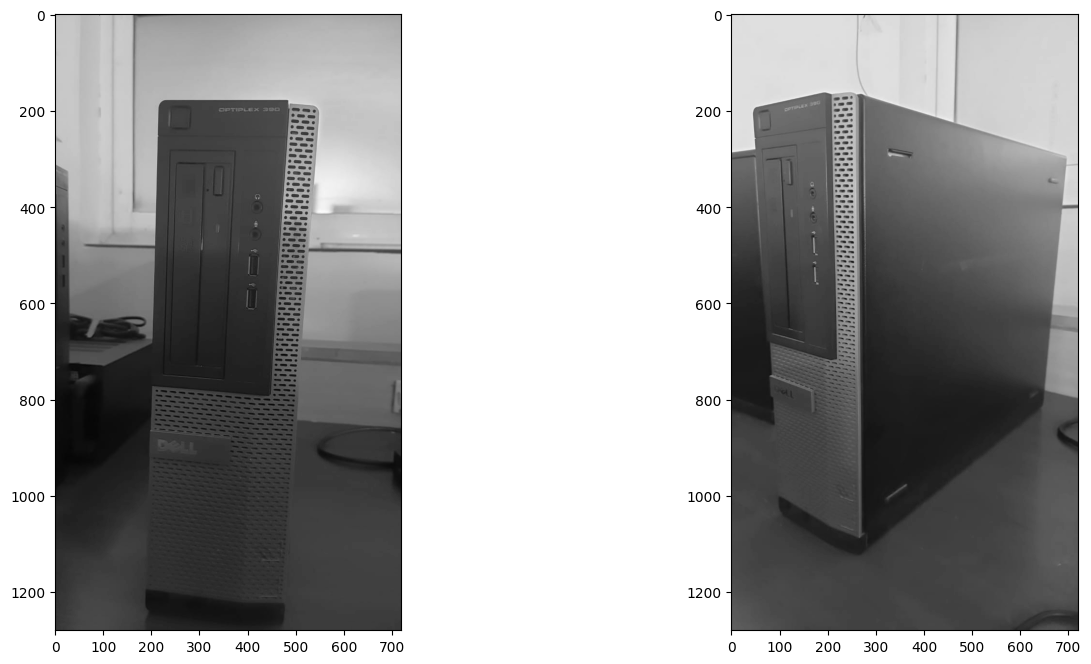

In [90]:
figure, ax=plt.subplots(1,2, figsize=(16,8))

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')

In [91]:
sift=cv2.xfeatures2d.SIFT_create()

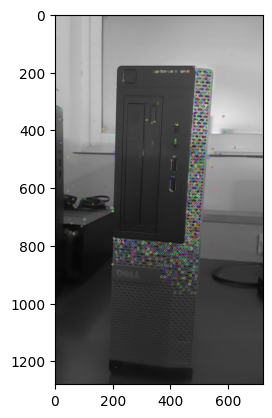

In [92]:
keypoints_1, descriptors_1=sift.detectAndCompute(img1,None)
image1=cv2.drawKeypoints(img1,keypoints_1,img1)
plt.imshow(image1)

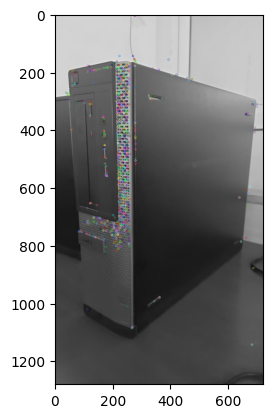

In [93]:
keypoints_2, descriptors_2=sift.detectAndCompute(img2,None)
image2=cv2.drawKeypoints(img2,keypoints_2,img2)
plt.imshow(image2)

In [94]:
len(keypoints_1), len(keypoints_2)

(1548, 942)

In [95]:
# Feature Matching
bf=cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches=bf.match(descriptors_1, descriptors_2)

In [96]:
matches=sorted(matches, key=lambda x:x.distance)

In [97]:
len(matches)

212

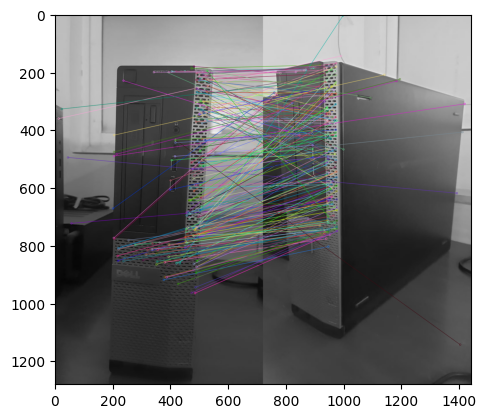

In [98]:
img3=cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:200], img2, flags=2)
plt.imshow(img3)

In [99]:
#extract matched keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2) #this extracts x,y coordinates of keypoints for img1
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [100]:
# Perform perspective transformation
M,_=cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

In [101]:
#Apply perspective transformation on first image
registered_image=cv2.warpPerspective(image1, M, dsize=(image2.shape[1], image2.shape[0]))  #img1 is getting transformed to be like 2

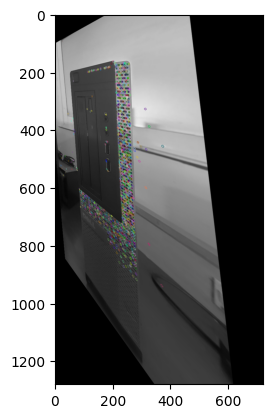

In [102]:
#display registered image
plt.imshow(registered_image)

Text(0.5, 1.0, 'Registered Image')

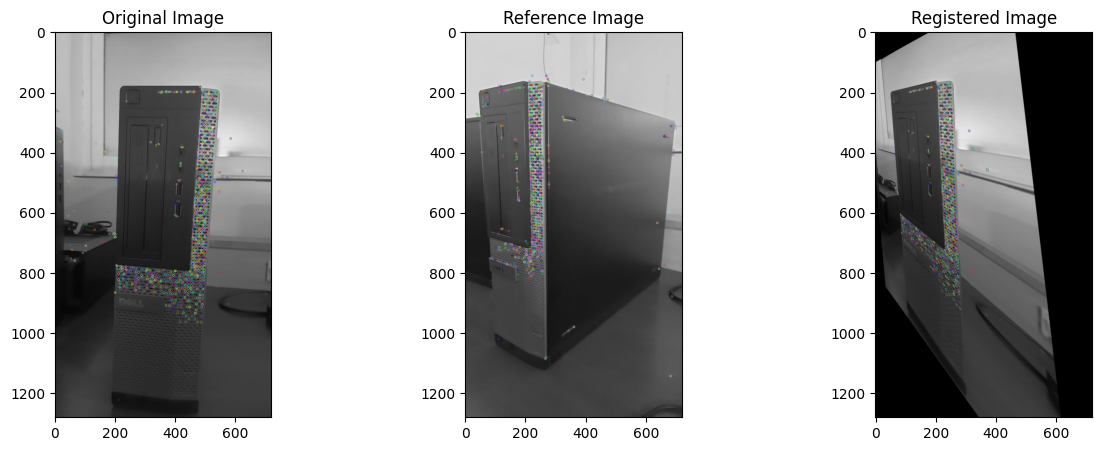

In [103]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Reference Image')

plt.subplot(1, 3, 3)
plt.imshow(registered_image, cmap='gray')
plt.title('Registered Image')